In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df=pd.read_csv(r"Diabetes.csv",dtype=float)

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
class LinearRegression:
    def __init__(self,X_train,X_test,y_train,y_test):
        self.trainx=X_train
        self.testx=X_test
        self.trainy=y_train
        self.testy=y_test
        self.M=None
        self.C=None
        self.predicted=None
    def mse(self, Y, Yp):
        if len(Y) != len(Yp):
            raise ValueError("Actual and predicted arrays' lengths are not equal")
        return n.mean((Y-Yp)**2)
        
    def find_equation(self):
        if len(self.trainx) != len(self.trainy):
            raise ValueError("Input and target arrays' lengths are not equal")

        x_values = self.trainx.values
        y_values = self.trainy.values.reshape(-1,1)
        x_mean = np.mean(x_values, axis=0)
        y_mean = np.mean(y_values)
        
        numerator = np.sum((x_values - x_mean) * (y_values - y_mean), axis=0)
        denominator = np.sum((x_values - x_mean) ** 2, axis=0)
    
        self.M = numerator / denominator
        self.C = y_mean - np.sum(self.M * x_mean)
        
    def predict(self):
        if self.M is None or self.C is None:
            self.find_equation()
        # Convert test data to numpy array
        test_x_values = self.testx.values
        # Perform matrix multiplication to get predicted values
        self.predicted = np.dot(test_x_values, self.M) + self.C
    def evaluate_predictions(self):
        self.predict()
        mae = mean_absolute_error(self.testy.values,self.predicted)
        mse = mean_squared_error(self.testy.values, self.predicted)
        rmse = np.sqrt(mse)
        
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")    
    def show_plot(self):
        if self.predicted is None:
            self.predict()  # Ensure predictions are made before plotting
        
        if len(self.testy) != len(self.predicted):
            raise ValueError("Actual and predicted arrays must have the same length")
        
        # Plot scatter plot of actual vs. predicted values
        plt.scatter(self.testy, self.predicted, label='Actual vs. Predicted', color='blue')
        
        # Plot identity line (line where actual equals predicted)
        min_val = min(min(self.testy), min(self.predicted))
        max_val = max(max(self.testy), max(self.predicted))
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Identity Line')
        
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()


In [39]:
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis="columns")
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr=LinearRegression(X_train, X_test, y_train, y_test)
lr.evaluate_predictions()

Mean Absolute Error (MAE): 0.3703037178674118
Mean Squared Error (MSE): 0.23173959801382005
Root Mean Squared Error (RMSE): 0.48139339215845084


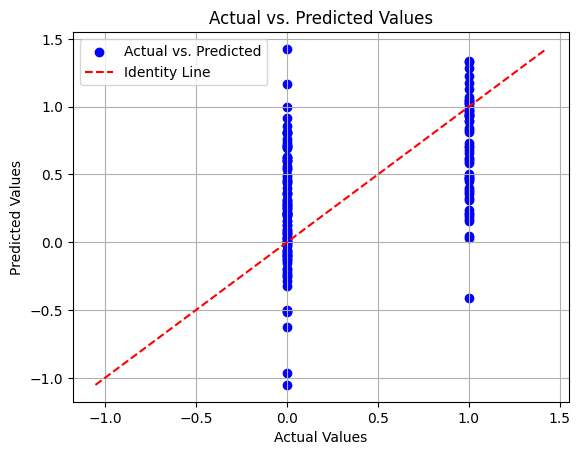

In [32]:
lr.predict()
lr.show_plot()

In [11]:
np.mean(X.values,axis=0)

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [39]:
type(X["SkinThickness"][0])

numpy.int64

In [34]:
X.mean

<bound method DataFrame.mean of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1    